In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_excel('shoe.xlsx')
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


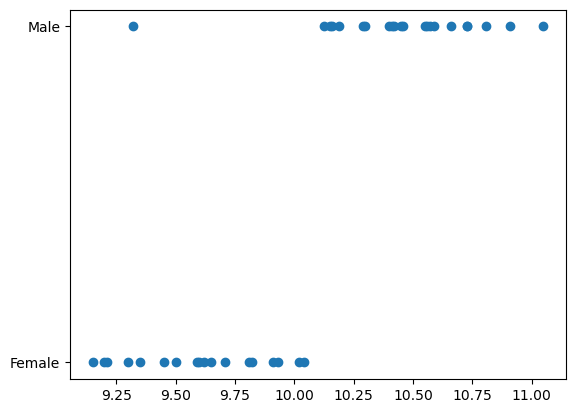

In [3]:
plt.scatter(df['size(cm)'],df['class(y)'])

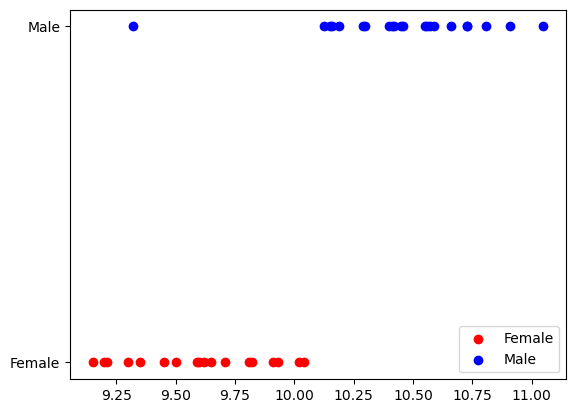

In [4]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')

plt.legend()

# Preprocessing

In [5]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [6]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [7]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=55)

In [8]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [9]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

# Logistic Regression

In [10]:
reg = LogisticRegression()

In [11]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [12]:
m = reg.coef_
m

array([[2.10745564]])

In [13]:
c = reg.intercept_
c

array([-20.81422921])

In [14]:
Log_pred = reg.predict(xtest)

In [15]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [16]:
Log_score = reg.score(xtest,ytest)
Log_score

0.9166666666666666

In [17]:
mae1 = mean_absolute_error(ytest,Log_pred)
mae1

0.08333333333333333

In [18]:
mse1 = mean_squared_error(ytest,Log_pred)
mse1

0.08333333333333333

# Decision Tree

In [19]:
dt = DecisionTreeClassifier()

In [20]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [21]:
dt_pred = dt.predict(xtest)

In [22]:
dt_score = dt.score(xtest,ytest)
dt_score

1.0

In [23]:
mae2 = mean_absolute_error(ytest,dt_pred)
mae2

0.0

In [24]:
mse2 = mean_squared_error(ytest,dt_pred)
mse2

0.0

# KNN

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [27]:
knn_pred = knn.predict(xtest)

In [28]:
knn_score = knn.score(xtest,ytest)
knn_score

1.0

In [29]:
mae3 = mean_absolute_error(ytest,knn_pred)
mae3

0.0

In [30]:
mse3 = mean_squared_error(ytest,knn_pred)
mse3

0.0

# Visualization

In [31]:
data = {
   'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy',
           'DT_mae','DT_mse','DT_accuracy',
           'KNN_mae','KNN_mse','KNN_accuracy'],
   'Accuracy':[mae1,mse1,Log_score, mae2,mse2,dt_score, mae3,mse3,knn_score]}
df_after_pred = pd.DataFrame(data=data)

In [32]:
df_after_pred

,Name,Accuracy
0,Logistic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic_accuracy,0.916667
3,DT_mae,0.000000
4,DT_mse,0.000000
5,DT_accuracy,1.000000
6,KNN_mae,0.000000
7,KNN_mse,0.000000
8,KNN_accuracy,1.000000


<Axes: xlabel='Accuracy', ylabel='Name'>

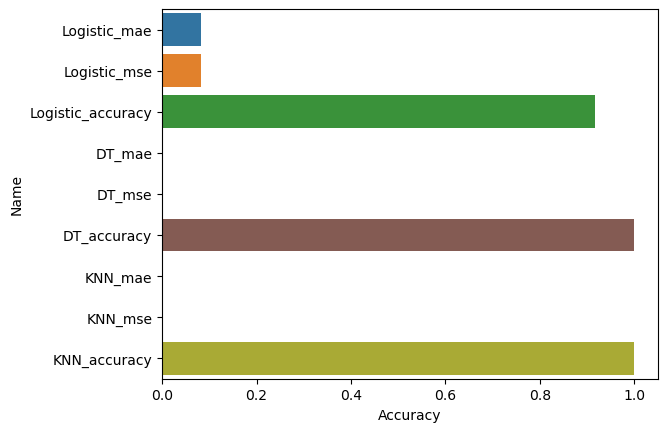

In [33]:
sns.barplot(x='Accuracy', y='Name', data=df_after_pred)